## Al Dente's Restaurant Report

In [471]:
# import the required libraries

import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt

In [472]:
# Taking a look at the info
df = pd.read_csv('data/cleaned_data/final_merged_customer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   order_id                   10000 non-null  object 
 1   customer_id                10000 non-null  int64  
 2   items                      10000 non-null  int64  
 3   aperitifs                  10000 non-null  object 
 4   appetizers                 10000 non-null  object 
 5   entrees                    10000 non-null  object 
 6   desserts                   10000 non-null  object 
 7   total                      10000 non-null  float64
 8   total_orders               10000 non-null  int64  
 9   total_items                10000 non-null  int64  
 10  total_spent                10000 non-null  float64
 11  customer_demographic_id    9992 non-null   object 
 12  name                       9992 non-null   object 
 13  email                      8803 non-null   obje

 #### Al wants to open up restaurants in areas that are good for his business, but should we:
- A) Set up shop in areas with the most customers?
 ##### or
- B) Set up shop in areas with customers that spend more money?


In [473]:
# Finding the cities that made the most orders
most_orders = df["state"].value_counts().sort_values(ascending=False).head(10)
states_most_orders = most_orders.index.tolist()
print(states_most_orders)
most_orders

['Massachusetts', 'Maryland', 'Louisiana', 'South Carolina', 'North Carolina', 'California', 'Vermont', 'New Hampshire', 'Georgia', 'Florida']


state
Massachusetts     230
Maryland          228
Louisiana         225
South Carolina    223
North Carolina    217
California        210
Vermont           209
New Hampshire     209
Georgia           208
Florida           208
Name: count, dtype: int64

/tmp/ipykernel_27537/1792513844.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_orders.index, y=most_orders.values, palette='Set2')


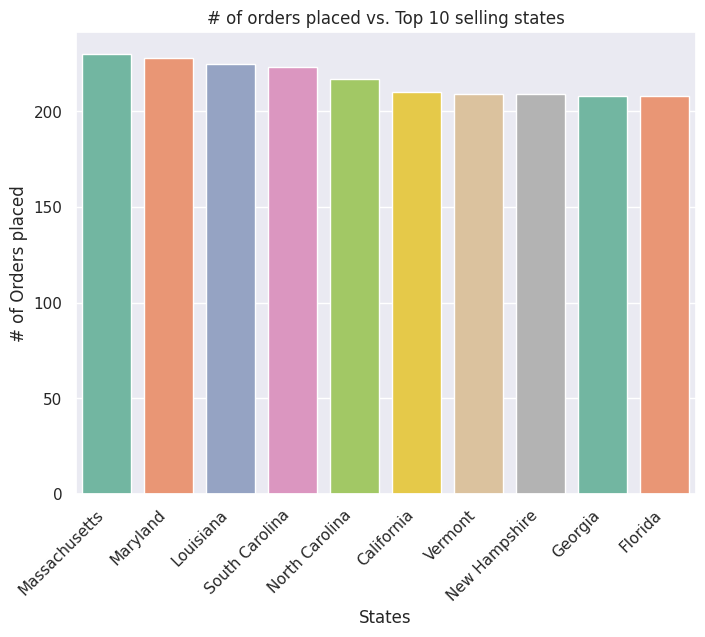

In [474]:

# Setting style
sns.set(style="darkgrid")

# Creating bar plot from series
plt.figure(figsize=(8,6))
sns.barplot(x=most_orders.index, y=most_orders.values, palette='Set2')

plt.xticks(rotation=45, ha="right")

# Adding labels and titles
plt.xlabel('States')
plt.ylabel('# of Orders placed')
plt.title('# of orders placed vs. Top 10 selling states')


# Show plot
plt.show()

In [475]:
# Find out how much money was made in the states with the most orders
states_most_orders_df = df[df['state'].isin(states_most_orders)]
states_most_orders_revenue = "{:.2f}".format(states_most_orders_df['total_spent'].sum())

print(f"""Total revenue: ${states_most_orders_revenue}
Orders completed: {len(states_most_orders_df)}
Avg $ per order: ${'{:.2f}'.format(states_most_orders_df['total_spent'].sum()/len(states_most_orders_df))}""")

Total revenue: $2496890.39
Orders completed: 2167
Avg $ per order: $1152.23


In [476]:
# Finding the states that spent the most money
most_revenue = df.groupby('state')['total_spent'].sum()
most_revenue = most_revenue.reset_index().sort_values(by='total_spent')
most_revenue = most_revenue.sort_values(by='total_spent', ascending=False).head(10)
states_most_revenue = most_revenue.set_index('state').index.tolist()
print(states_most_revenue)
most_revenue

['Maryland', 'Massachusetts', 'Illinois', 'Louisiana', 'Georgia', 'South Carolina', 'Ohio', 'New Hampshire', 'Michigan', 'North Carolina']


,state,total_spent
19,Maryland,282706.97
20,Massachusetts,273518.45
12,Illinois,263169.71
17,Louisiana,261845.45
9,Georgia,260986.75
39,South Carolina,256193.31
34,Ohio,249628.16
28,New Hampshire,249444.04
21,Michigan,241979.89
32,North Carolina,237892.42


/tmp/ipykernel_27537/4044625139.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='total_spent', data=most_revenue, palette='Set2')


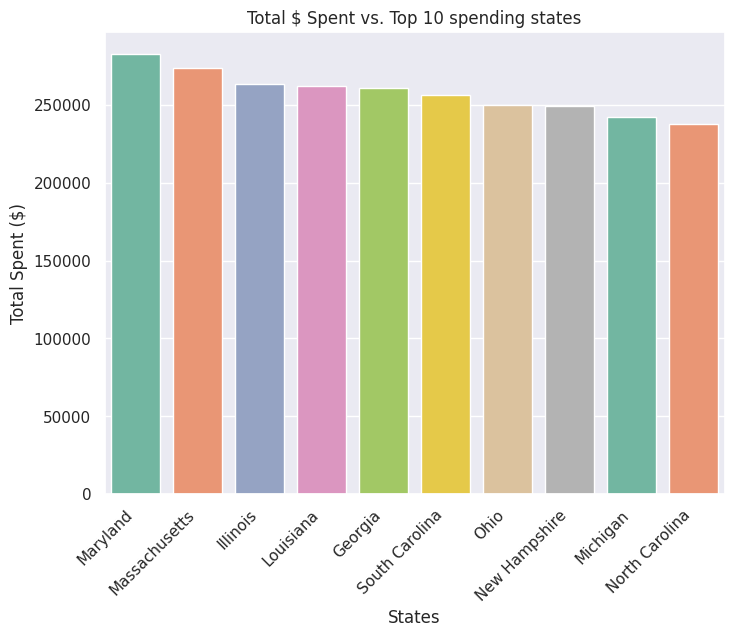

In [519]:
# Setting style
sns.set(style="darkgrid")

# Creating bar plot from series
plt.figure(figsize=(8,6))
sns.barplot(x='state', y='total_spent', data=most_revenue, palette='Set2')

plt.xticks(rotation=45, ha="right")

# Adding labels and titles
plt.xlabel('States')
plt.ylabel('Total Spent ($)')
plt.title('Total $ Spent vs. Top 10 spending states')

# Show plot
plt.show()

In [520]:
# Find out how much money was made in the states with the most revenue
states_most_revenue_df = df[df['state'].isin(states_most_revenue)]

print(f"""Total Revenue: ${'{:.2f}'.format(most_revenue['total_spent'].sum())}
Orders completed: {len(states_most_revenue_df)}
Avg $ per order: ${'{:.2f}'.format(most_revenue['total_spent'].sum()/len(states_most_revenue_df))}""")

Total Revenue: $2577365.15
Orders completed: 2153
Avg $ per order: $1197.10


#### With the states spending the most money generating the most total revenue and revenue per order, we can conclude that we should set up restaurant locations in `states_most_orders`.

In [479]:
# Creating dataframes using the states in our list of states with the most revenue 
first_state_df = states_most_revenue_df[states_most_revenue_df['state'] == states_most_revenue[0]]
second_state_df = states_most_revenue_df[states_most_revenue_df['state'] == states_most_revenue[1]]
third_state_df = states_most_revenue_df[states_most_revenue_df['state'] == states_most_revenue[2]]
fourth_state_df = states_most_revenue_df[states_most_revenue_df['state'] == states_most_revenue[3]]
fifth_state_df = states_most_revenue_df[states_most_revenue_df['state'] == states_most_revenue[4]]

### Lets explore state #1 (Maryland)

In [480]:
#Finding the 5 most ordered aperitifs
first_state_df['aperitifs'].value_counts()

aperitifs
Aperol Spritz       29
Bellini             28
Vermouth            25
Port                22
Sherry              21
Kir                 18
Americano           18
Champagne           17
Campari and Soda    17
Negroni             17
Kir Royale          16
Name: count, dtype: int64

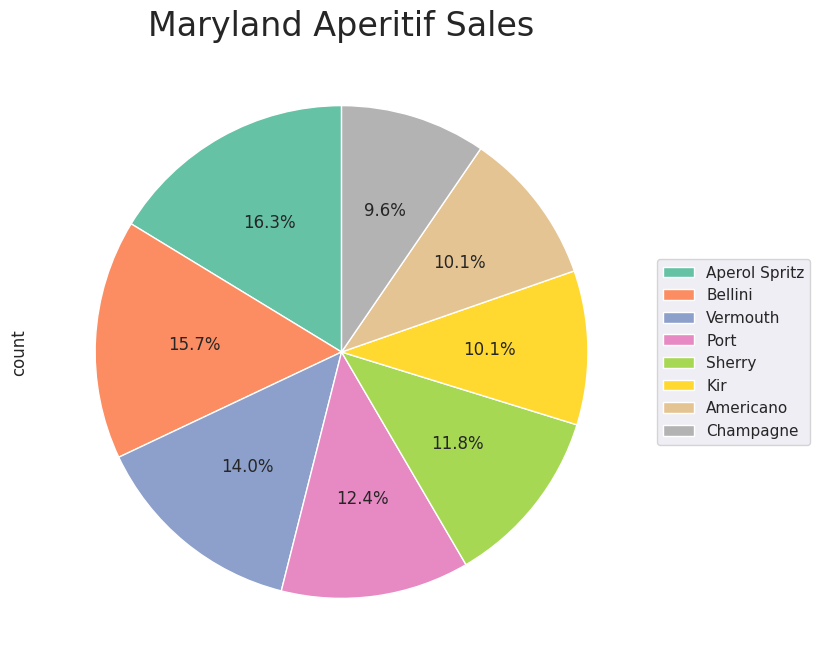

In [529]:
# Creating a pie graph
fs_data = first_state_df['aperitifs'].value_counts().head(8)
fs_data.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), labels=None)

# Add legend
plt.legend(fs_data.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Maryland Aperitif Sales', fontsize=24)

# Show the plot
plt.show()


In [482]:
#Finding the 5 most ordered entrees
first_state_df['entrees'].value_counts()

entrees
Lobster       29
Steak         27
Pork          24
Chicken       23
Burger        22
Pasta         20
Fish          19
Lamb          18
Vegetarian    16
Duck          15
Pizza         15
Name: count, dtype: int64

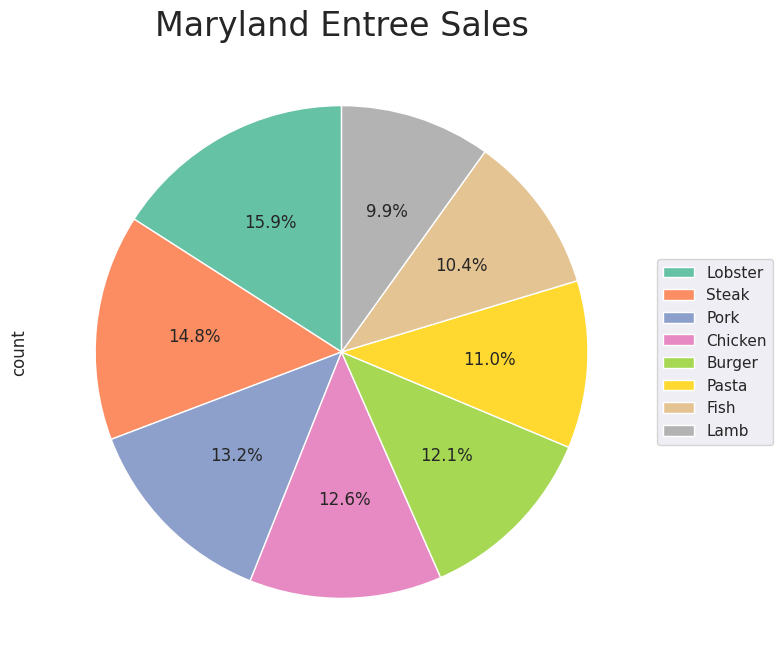

In [531]:
# Creating a pie graph
fs_data = first_state_df['entrees'].value_counts().head(8)
fs_data.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), labels=None)

# Add legend
plt.legend(fs_data.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Maryland Entree Sales', fontsize=24)

# Show the plot
plt.show()

In [484]:
#Finding the 5 most ordered desserts
first_state_df["desserts"].value_counts()

desserts
Sorbet            27
Tiramisu          24
Pie               24
Creme Brulee      23
Cheesecake        22
Cookies           21
Cobbler           20
Chocolate         18
Chocolate Cake    17
Pudding           16
Ice Cream         16
Name: count, dtype: int64

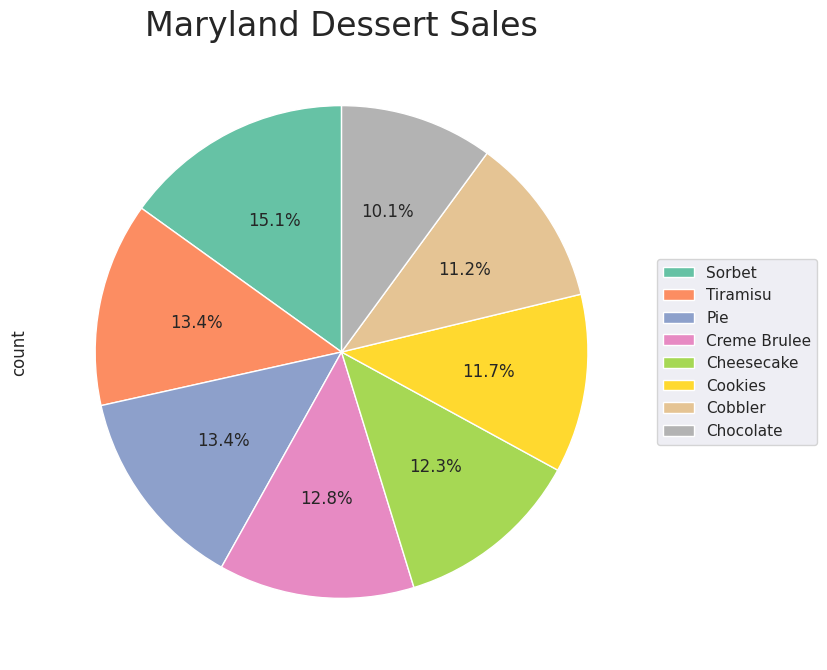

In [532]:
# Creating a pie graph
fs_data = first_state_df['desserts'].value_counts().head(8)
fs_data.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), labels=None)

# Add legend
plt.legend(fs_data.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Maryland Dessert Sales', fontsize=24)

# Show the plot
plt.show()

In [486]:
#Finding the most 5 ordered appetizers
first_state_df["appetizers"].value_counts()

appetizers
Caviar           25
Salad            23
Cheese Plate     23
Crudites         23
Soup             22
Oysters          21
Pate             20
Escargot         19
Smoked Salmon    19
Foie Gras        19
Charcuterie      14
Name: count, dtype: int64

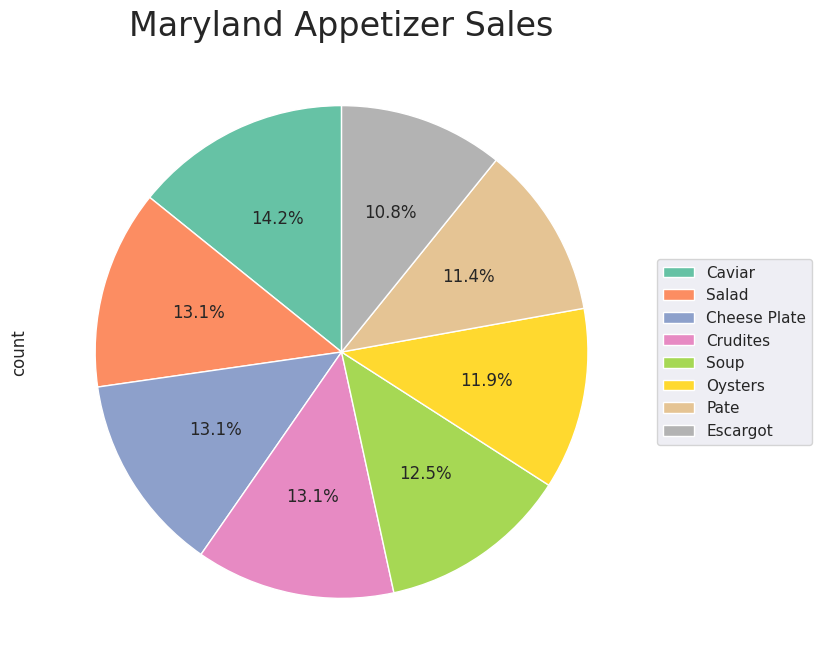

In [533]:
# Creating a pie graph
fs_data = first_state_df['appetizers'].value_counts().head(8)
fs_data.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), labels=None)

# Add legend
plt.legend(fs_data.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Maryland Appetizer Sales', fontsize=24)

# Show the plot
plt.show()

### Lets explore state #2 (Massachusetts)

In [488]:
#Finding the most ordered aperitifs
second_state_df['aperitifs'].value_counts()

aperitifs
Port                29
Bellini             26
Aperol Spritz       24
Campari and Soda    22
Vermouth            20
Negroni             20
Kir                 19
Champagne           19
Americano           17
Kir Royale          17
Sherry              17
Name: count, dtype: int64

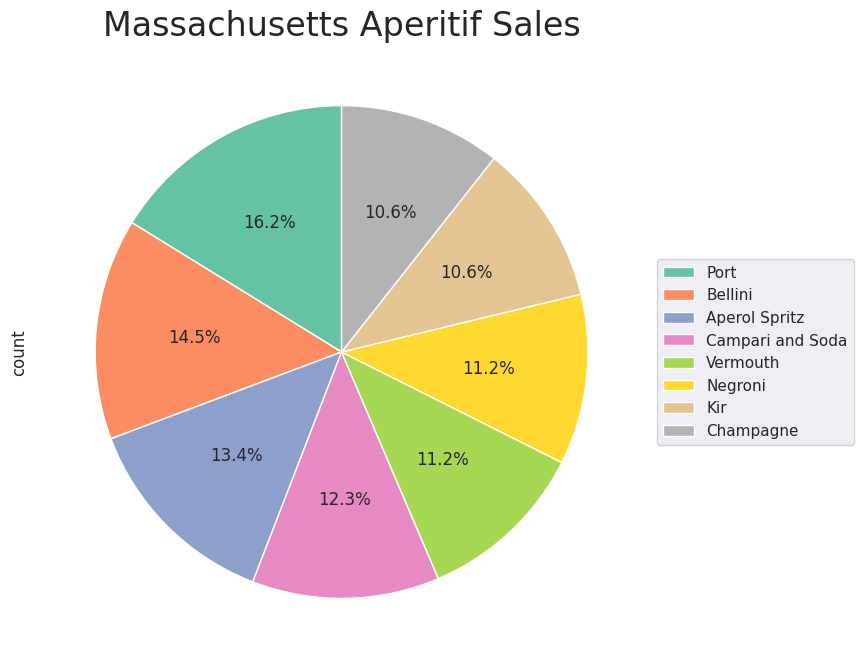

In [534]:
# Creating a pie graph
ss_data = second_state_df['aperitifs'].value_counts().head(8)
ss_data.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), labels=None)

# Add legend
plt.legend(ss_data.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Massachusetts Aperitif Sales', fontsize=24)

# Show the plot
plt.show()

In [490]:
#Finding the most ordered entrees
second_state_df['entrees'].value_counts()

entrees
Pork          28
Steak         28
Duck          26
Pasta         24
Pizza         21
Lobster       21
Chicken       19
Burger        19
Vegetarian    17
Lamb          17
Fish          10
Name: count, dtype: int64

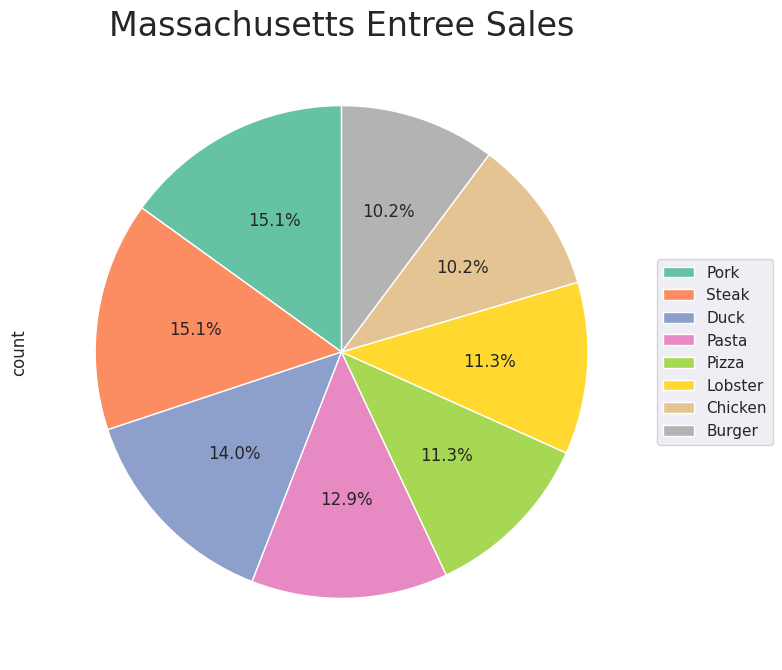

In [535]:
# Creating a pie graph
ss_data = second_state_df['entrees'].value_counts().head(8)
ss_data.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), labels=None)

# Add legend
plt.legend(ss_data.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Massachusetts Entree Sales', fontsize=24)

# Show the plot
plt.show()

In [492]:
#Finding the most ordered desserts
second_state_df["desserts"].value_counts()

desserts
Pudding           31
Tiramisu          27
Creme Brulee      26
Cobbler           24
Cookies           22
Chocolate Cake    18
Chocolate         18
Pie               18
Cheesecake        17
Ice Cream         17
Sorbet            12
Name: count, dtype: int64

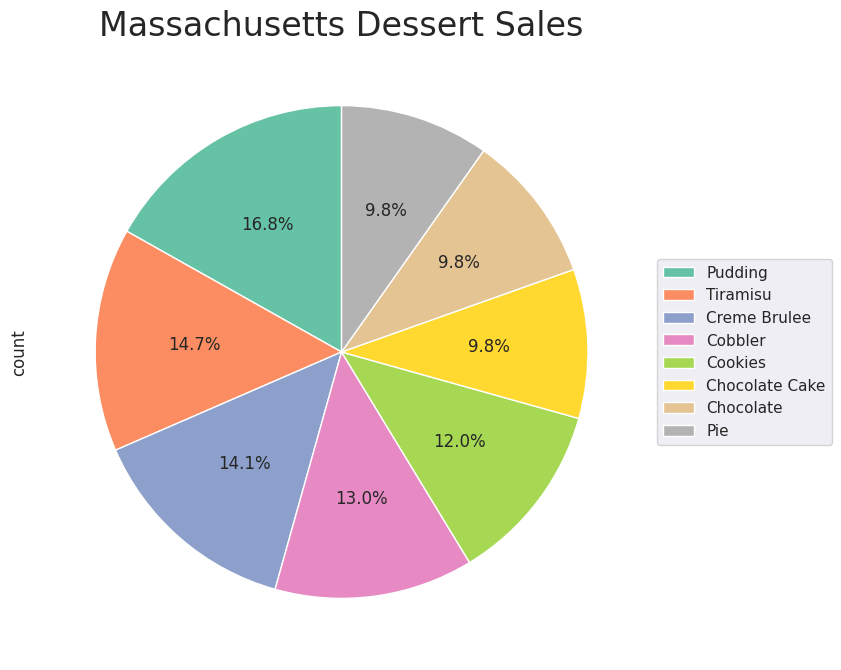

In [536]:
# Creating a pie graph
ss_data = second_state_df['desserts'].value_counts().head(8)
ss_data.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), labels=None)

# Add legend
plt.legend(ss_data.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Massachusetts Dessert Sales', fontsize=24)

# Show the plot
plt.show()

In [494]:
#Finding the most ordered appetizers
first_state_df["appetizers"].value_counts()

appetizers
Caviar           25
Salad            23
Cheese Plate     23
Crudites         23
Soup             22
Oysters          21
Pate             20
Escargot         19
Smoked Salmon    19
Foie Gras        19
Charcuterie      14
Name: count, dtype: int64

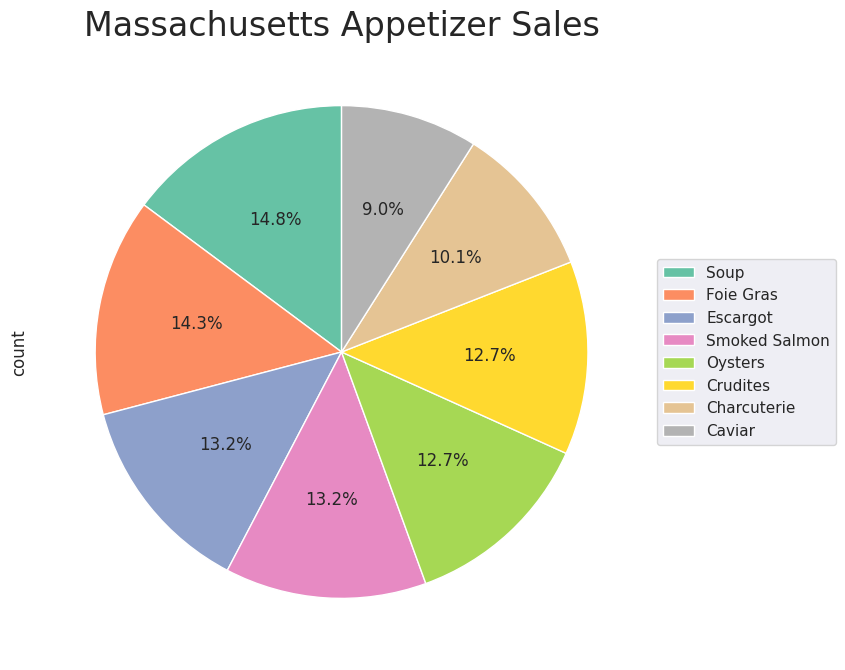

In [537]:
# Creating a pie graph
ss_data = second_state_df['appetizers'].value_counts().head(8)
ss_data.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), labels=None)

# Add legend
plt.legend(ss_data.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Massachusetts Appetizer Sales', fontsize=24)

# Show the plot
plt.show()

### Lets explore state #3 (Illinois)

In [496]:
#Finding the most ordered aperitifs
third_state_df['aperitifs'].value_counts()

aperitifs
Sherry              25
Kir Royale          24
Americano           24
Vermouth            23
Campari and Soda    18
Negroni             18
Bellini             16
Champagne           15
Kir                 14
Port                14
Aperol Spritz       13
Name: count, dtype: int64

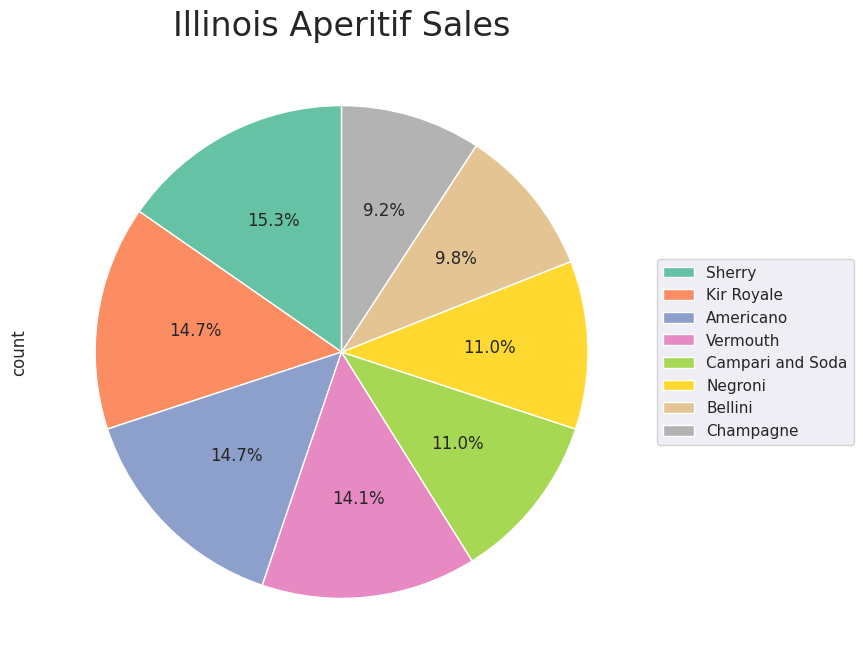

In [538]:
# Creating a pie graph
ts_data = third_state_df['aperitifs'].value_counts().head(8)
ts_data.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), labels=None)

# Add legend
plt.legend(ts_data.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Illinois Aperitif Sales', fontsize=24)

# Show the plot
plt.show()

In [498]:
#Finding the most ordered entrees
third_state_df['entrees'].value_counts()

entrees
Steak         27
Pork          26
Pasta         21
Duck          20
Vegetarian    18
Pizza         18
Burger        16
Lobster       16
Lamb          16
Chicken       13
Fish          13
Name: count, dtype: int64

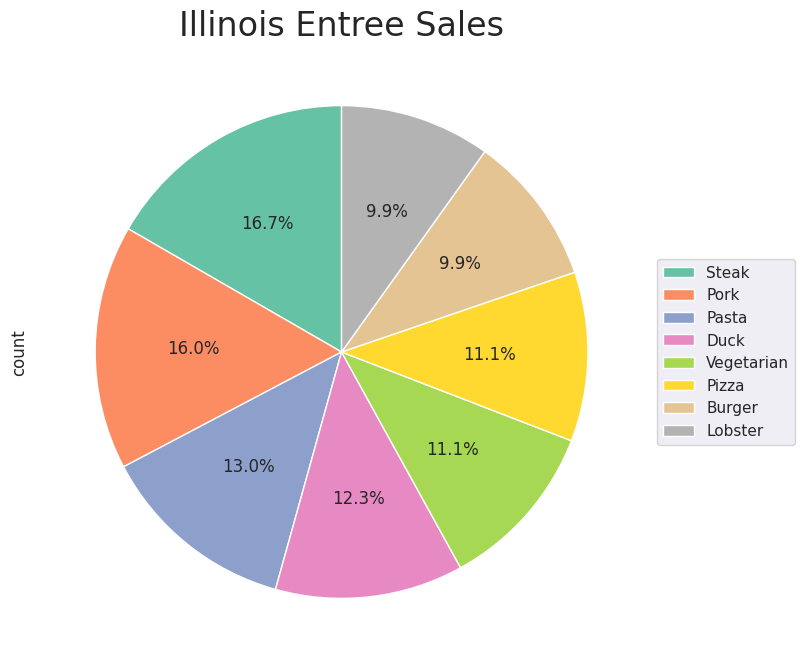

In [539]:
# Creating a pie graph
ts_data = third_state_df['entrees'].value_counts().head(8)
ts_data.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), labels=None)

# Add legend
plt.legend(ts_data.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Illinois Entree Sales', fontsize=24)

# Show the plot
plt.show()

In [499]:
#Finding the most ordered desserts
third_state_df["desserts"].value_counts()

desserts
Chocolate         22
Sorbet            21
Pudding           21
Cheesecake        20
Cobbler           20
Tiramisu          20
Pie               19
Chocolate Cake    17
Ice Cream         16
Cookies           15
Creme Brulee      13
Name: count, dtype: int64

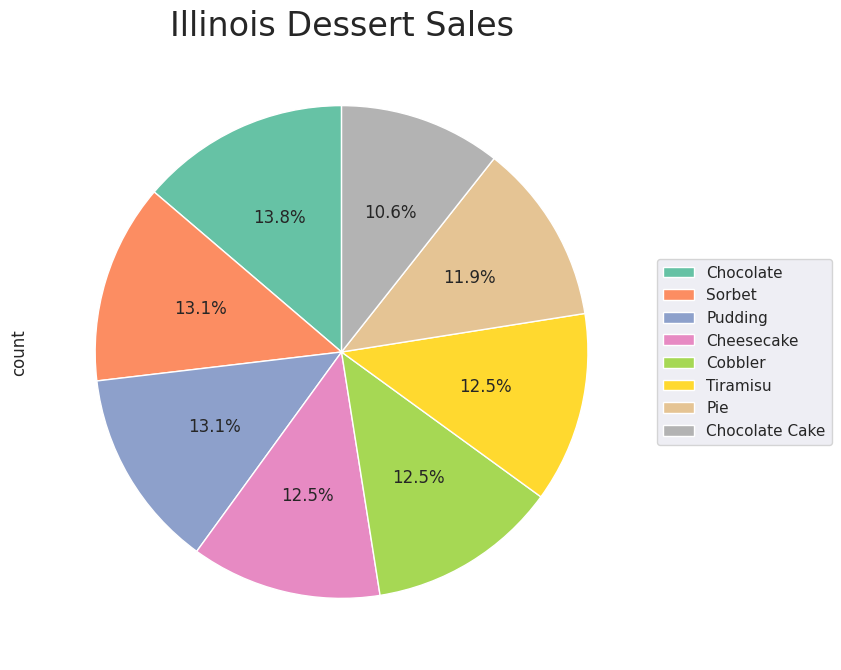

In [541]:
# Creating a pie graph
ts_data = third_state_df['desserts'].value_counts().head(8)
ts_data.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), labels=None)

# Add legend
plt.legend(ts_data.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Illinois Dessert Sales', fontsize=24)

# Show the plot
plt.show()

In [501]:
#Finding the most ordered appetizers
third_state_df["appetizers"].value_counts()

appetizers
Salad            25
Charcuterie      24
Foie Gras        23
Soup             21
Pate             20
Oysters          20
Escargot         17
Smoked Salmon    16
Crudites         14
Caviar           13
Cheese Plate     11
Name: count, dtype: int64

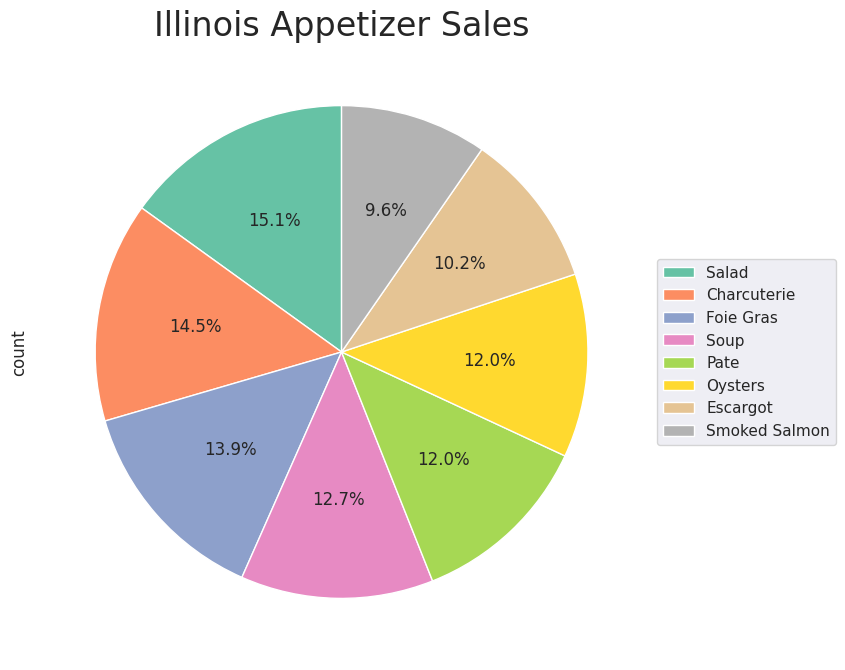

In [540]:
# Creating a pie graph
ts_data = third_state_df['appetizers'].value_counts().head(8)
ts_data.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), labels=None)

# Add legend
plt.legend(ts_data.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Setting palette
sns.set_palette('Set2')

# Adding title
plt.title('Illinois Appetizer Sales', fontsize=24)

# Show the plot
plt.show()

### Lets explore state #4 (Louisiana)

In [503]:
#Finding the most ordered appetizers
fourth_state_df["appetizers"].value_counts()

appetizers
Salad            26
Smoked Salmon    24
Caviar           23
Charcuterie      22
Pate             22
Soup             20
Escargot         20
Oysters          18
Crudites         18
Cheese Plate     17
Foie Gras        15
Name: count, dtype: int64

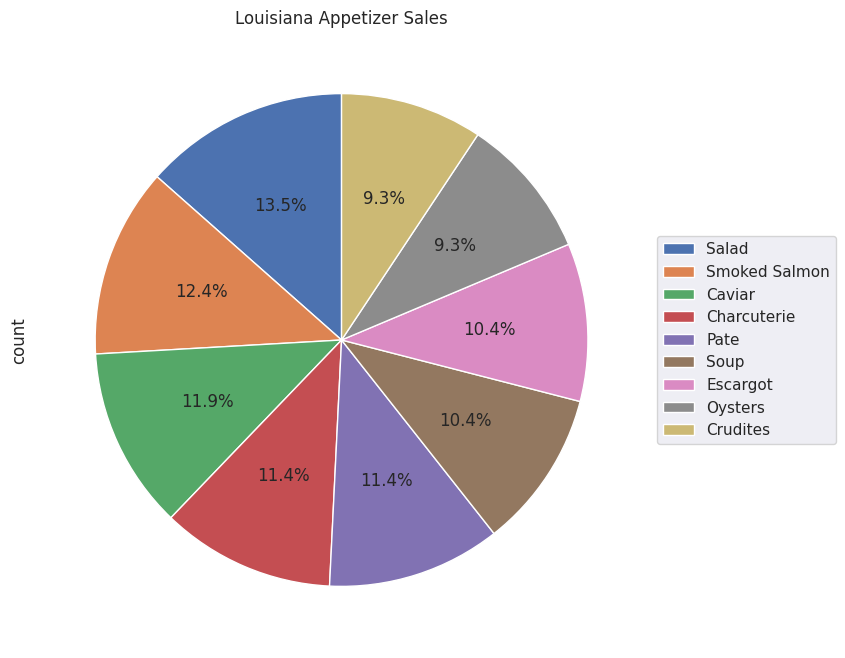

In [504]:
# Creating a pie graph
fos_data = fourth_state_df['appetizers'].value_counts().head(9)
fos_data.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), labels=None)

# Add legend
plt.legend(fos_data.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Adding title
plt.title('Louisiana Appetizer Sales')

# Show the plot
plt.show()

In [505]:
#Finding the most ordered desserts
fourth_state_df["desserts"].value_counts()

desserts
Chocolate         23
Pie               22
Chocolate Cake    21
Tiramisu          21
Cheesecake        21
Cobbler           21
Creme Brulee      20
Sorbet            20
Ice Cream         19
Pudding           19
Cookies           18
Name: count, dtype: int64

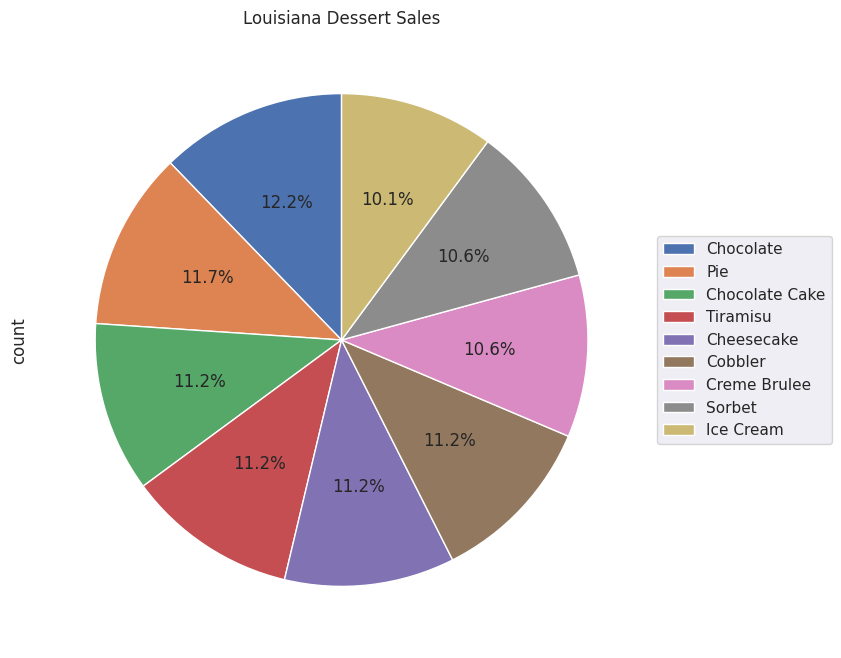

In [506]:
# Creating a pie graph
fos_data = fourth_state_df['desserts'].value_counts().head(9)
fos_data.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), labels=None)

# Add legend
plt.legend(fos_data.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Adding title
plt.title('Louisiana Dessert Sales')

# Show the plot
plt.show()

In [507]:
#Finding the most ordered entrees
fourth_state_df['entrees'].value_counts()

entrees
Steak         28
Pork          27
Pasta         23
Lamb          22
Lobster       21
Pizza         20
Burger        20
Chicken       19
Duck          17
Vegetarian    14
Fish          14
Name: count, dtype: int64

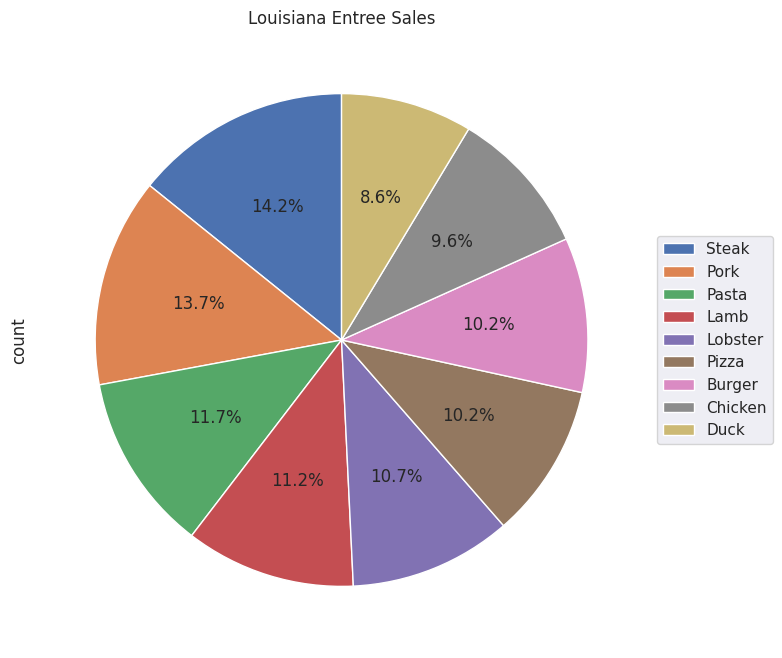

In [508]:
# Creating a pie graph
fos_data = fourth_state_df['entrees'].value_counts().head(9)
fos_data.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), labels=None)

# Add legend
plt.legend(fos_data.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Adding title
plt.title('Louisiana Entree Sales')

# Show the plot
plt.show()

In [509]:
#Finding the most ordered aperitifs
fourth_state_df['aperitifs'].value_counts()

aperitifs
Vermouth            25
Bellini             22
Champagne           22
Kir Royale          22
Kir                 21
Americano           21
Port                20
Negroni             20
Aperol Spritz       20
Campari and Soda    18
Sherry              14
Name: count, dtype: int64

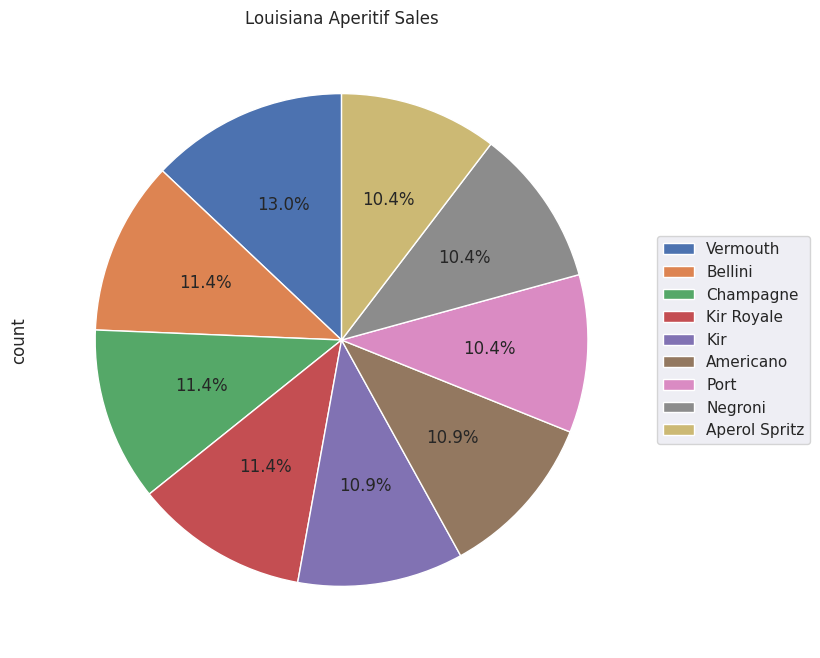

In [510]:
# Creating a pie graph
fos_data = fourth_state_df['aperitifs'].value_counts().head(9)
fos_data.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), labels=None)

# Add legend
plt.legend(fos_data.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Adding title
plt.title('Louisiana Aperitif Sales')

# Show the plot
plt.show()

### Lets explore state #5 (Georgia)

In [511]:
#Finding the most ordered appetizers
fifth_state_df["appetizers"].value_counts()

appetizers
Salad            24
Charcuterie      24
Pate             21
Crudites         20
Soup             20
Caviar           19
Escargot         19
Smoked Salmon    18
Oysters          15
Foie Gras        15
Cheese Plate     13
Name: count, dtype: int64

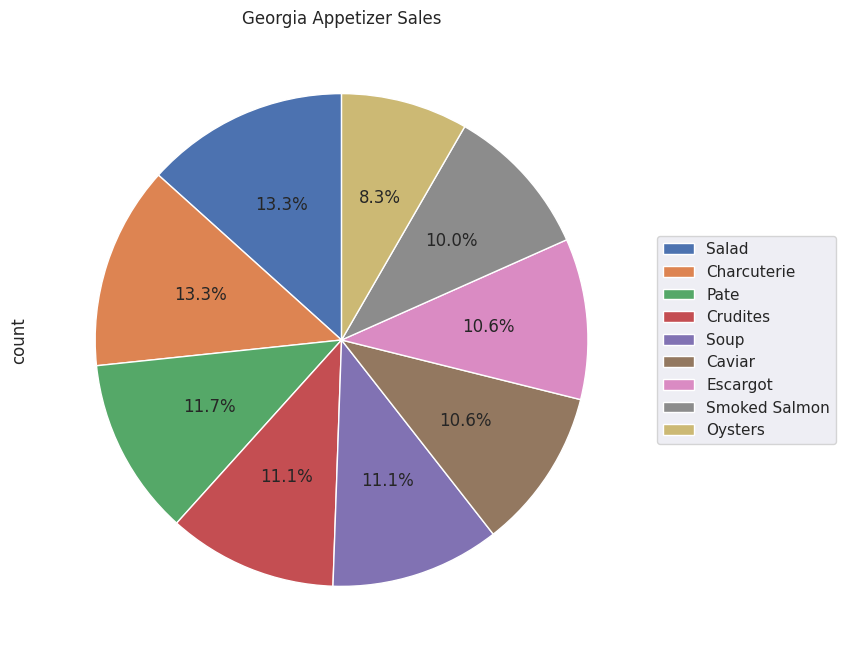

In [512]:
# Creating a pie graph
fis_data = fifth_state_df['appetizers'].value_counts().head(9)
fis_data.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), labels=None)

# Add legend
plt.legend(fis_data.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Adding title
plt.title('Georgia Appetizer Sales')

# Show the plot
plt.show()

In [513]:
#Finding the most ordered desserts
fifth_state_df["desserts"].value_counts()

desserts
Chocolate         25
Chocolate Cake    22
Sorbet            21
Tiramisu          20
Pudding           19
Cheesecake        19
Cookies           17
Cobbler           17
Creme Brulee      17
Pie               16
Ice Cream         15
Name: count, dtype: int64

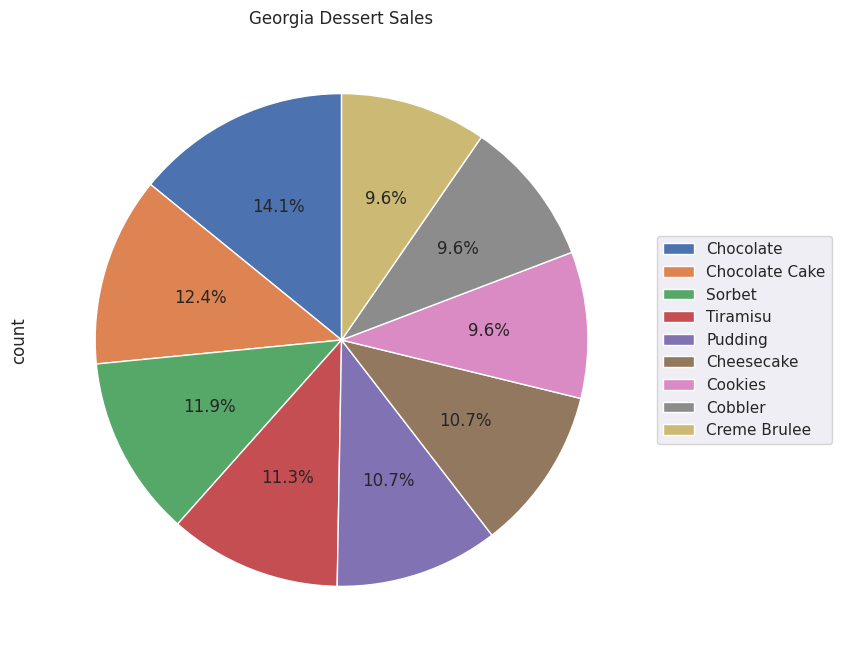

In [514]:
# Creating a pie graph
fis_data = fifth_state_df['desserts'].value_counts().head(9)
fis_data.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), labels=None)

# Add legend
plt.legend(fis_data.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Adding title
plt.title('Georgia Dessert Sales')

# Show the plot
plt.show()

In [515]:
#Finding the most ordered entrees
fifth_state_df['entrees'].value_counts()

entrees
Lamb          28
Fish          26
Pork          24
Pizza         22
Vegetarian    20
Steak         19
Chicken       16
Burger        16
Pasta         15
Duck          11
Lobster       11
Name: count, dtype: int64

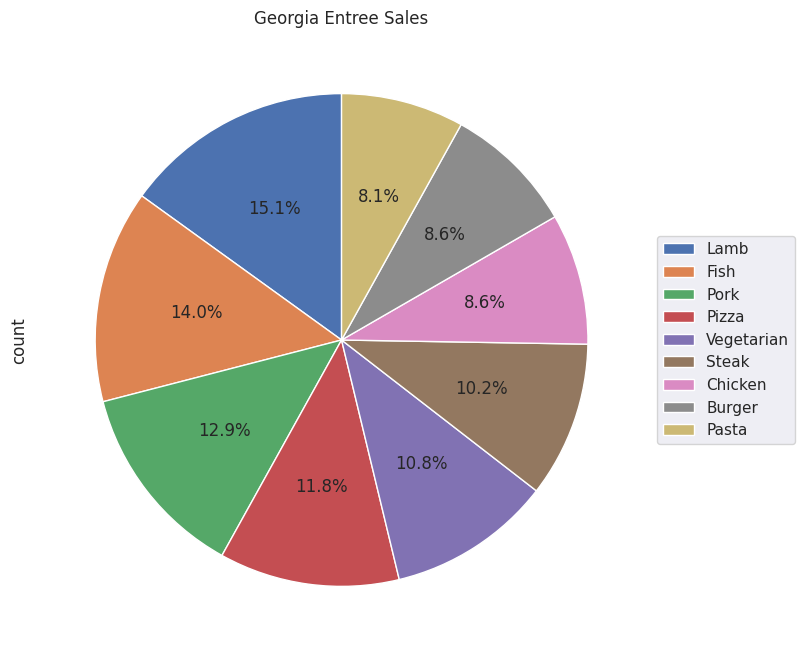

In [516]:
# Creating a pie graph
fis_data = fifth_state_df['entrees'].value_counts().head(9)
fis_data.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), labels=None)

# Add legend
plt.legend(fis_data.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Adding title
plt.title('Georgia Entree Sales')

# Show the plot
plt.show()

In [517]:
#Finding the most ordered aperitifs
fifth_state_df['aperitifs'].value_counts()

aperitifs
Vermouth            27
Campari and Soda    25
Sherry              20
Americano           19
Champagne           19
Aperol Spritz       18
Negroni             17
Bellini             17
Kir                 16
Kir Royale          15
Port                15
Name: count, dtype: int64

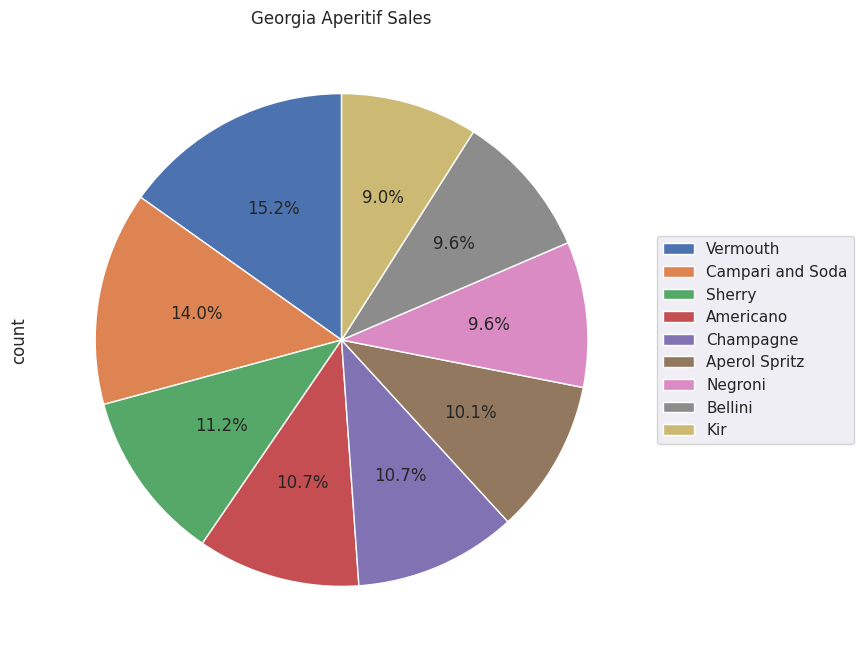

In [518]:
# Creating a pie graph
fis_data = fifth_state_df['aperitifs'].value_counts().head(9)
fis_data.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8,8), labels=None)

# Add legend
plt.legend(fis_data.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Adding title
plt.title('Georgia Aperitif Sales')

# Show the plot
plt.show()